In [7]:
import pandas as pd
import numpy as np
from plotnine import *
from plotnine.data import mtcars
import seaborn as sns

In [3]:
mtcars.head()

,name,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [4]:
mat_corr = np.round(mtcars.corr(), 1).reset_index()
mat_corr.shape, mat_corr.head()

((11, 12),
   index  mpg  cyl  disp   hp  drat   wt  qsec   vs   am  gear  carb
 0   mpg  1.0 -0.9  -0.8 -0.8   0.7 -0.9   0.4  0.7  0.6   0.5  -0.6
 1   cyl -0.9  1.0   0.9  0.8  -0.7  0.8  -0.6 -0.8 -0.5  -0.5   0.5
 2  disp -0.8  0.9   1.0  0.8  -0.7  0.9  -0.4 -0.7 -0.6  -0.6   0.4
 3    hp -0.8  0.8   0.8  1.0  -0.4  0.7  -0.7 -0.7 -0.2  -0.1   0.7
 4  drat  0.7 -0.7  -0.7 -0.4   1.0 -0.7   0.1  0.4  0.7   0.7  -0.1)

In [6]:
data = pd.melt(mat_corr, id_vars='index', var_name='var', value_name='value')
data['AbsValue'] = np.abs(data.value)
data.head()

,index,var,value,AbsValue
0,mpg,mpg,1.0,1.0
1,cyl,mpg,-0.9,0.9
2,disp,mpg,-0.8,0.8
3,hp,mpg,-0.8,0.8
4,drat,mpg,0.7,0.7


### seaborn

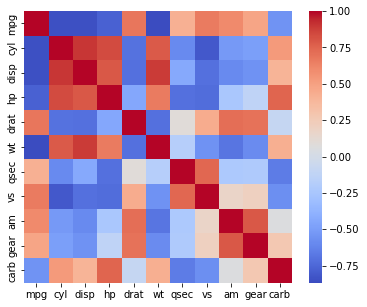

In [16]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(6, 5))
ax = sns.heatmap(mtcars.corr(), cmap='coolwarm')
plt.show()

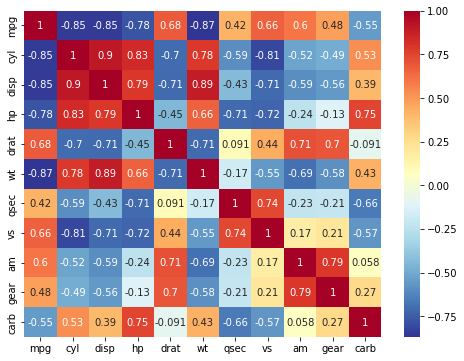

In [19]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.heatmap(mtcars.corr(), cmap='RdYlBu_r', annot=True)
plt.show()

### plotnine

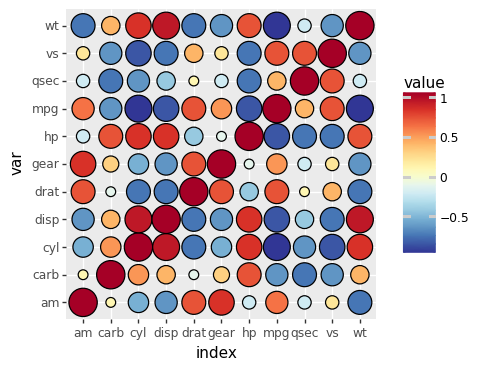

In [20]:
# 气泡图
p1 = (ggplot(data, aes(x='index', y='var', fill='value', size='AbsValue'))
      + geom_point(shape='o', color='black')
      + scale_size_area(max_size=11, guide=False)
      + scale_fill_cmap(cmap_name='RdYlBu_r')
      + coord_equal()
      + theme(figure_size=(4, 4), dpi=100)
     )
print(p1)

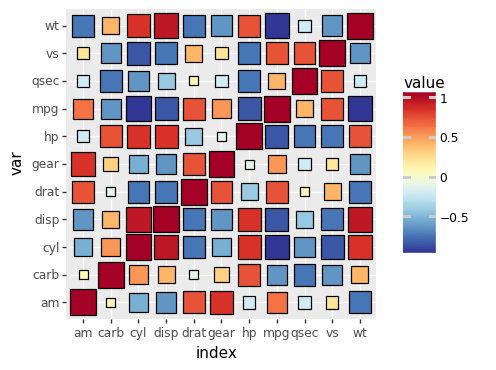

In [22]:
# 气泡图
p2 = (ggplot(data, aes(x='index', y='var', fill='value', size='AbsValue'))
      + geom_point(shape='s', color='black')
      + scale_size_area(max_size=10, guide=False)
      + scale_fill_cmap(cmap_name='RdYlBu_r')
      + coord_equal()
      + theme(figure_size=(4, 4), dpi=100)
     )
print(p2)

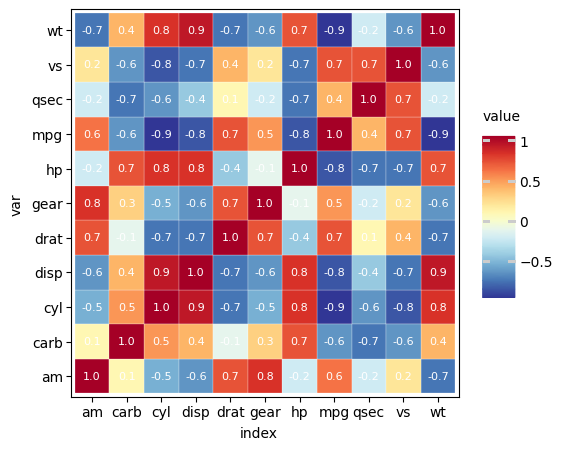

In [30]:
# 带标签的热力图
p3 = (ggplot(data, aes(x='index', y='var', fill='value', label='value'))
      + geom_tile(color='white')
      + geom_text(size=8, color='white')
      + scale_fill_cmap(cmap_name='RdYlBu_r')
      + coord_equal()
      + theme_matplotlib()
      + theme(dpi=100, figure_size=(5, 5))
     )
print(p3)